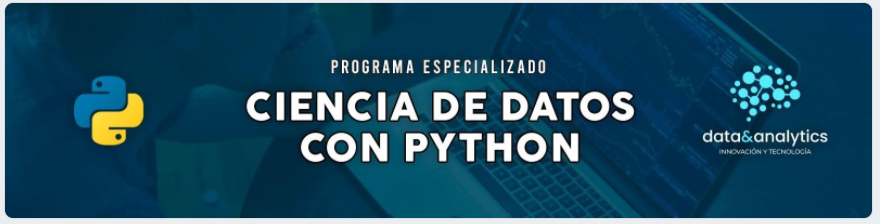

#DATA & ANALYTICS

----------------------------
CLASE 02. ANÁLISIS DESCRIPTIVO

Instructor: Ing. Yaneth Ccahuantico

E-mail: yane.data@gmail.com

Web: www.datayanalytics.com



###    DATA

In [ ]:
# instalamos
!pip install statistics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7453 sha256=ac051436cfa44f94f8176f56d7fc679d2d5d4383357878bd090c01978c755b9a
  Stored in directory: /root/.cache/pip/wheels/26/3c/70/9467407f3aa90862061eadcd286627b23a8bab6789b667776f
Successfully built statistics


In [ ]:
#cargamos las librerias
import pandas as pd
import seaborn as sns
import statistics as stats # estadística
import numpy as np
import scipy

import matplotlib.pyplot as plt

In [ ]:
#cargamos la data desde Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Subimos a un DataFrame

df = pd.read_csv('/content/drive/MyDrive/Data - DATA & ANALYTICS/data riesgos v2.csv', sep=',')

df = df.drop(df.columns[[0]], axis='columns')

df.head()

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo
0,2208,33,128,6,3230,192,2,3.0,2,1
1,2211,32,185,7,2930,217,2,1.0,5,1
2,2212,28,184,7,1884,202,2,1.0,2,1
3,2216,56,200,0,850,194,2,1.0,5,1
4,2218,32,131,65,3200,200,2,1.0,2,1


# Exploramos la data

In [ ]:
df.info()  # información detallada de las variables


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             4500 non-null   int64 
 1   edad           4500 non-null   int64 
 2   meses          4500 non-null   int64 
 3   max_ant        4500 non-null   int64 
 4   ingreso        4500 non-null   int64 
 5   score          4500 non-null   int64 
 6   tipo_vivienda  4500 non-null   int64 
 7   zona           4500 non-null   object
 8   nivel          4500 non-null   int64 
 9   riesgo         4500 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 351.7+ KB


In [ ]:
print("La cantidad de columnas en los datos es: ",df.shape[1])
print("La cantidad de filas en los datos es: ",df.shape[0])

La cantidad de columnas en los datos es:  10
La cantidad de filas en los datos es:  4500


In [ ]:
# Verificamos los duplicados
df[df["ID"].duplicated()].head()

# No se observan duplicados según el ID

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Revisamos los datos perdidos

df.isna().sum()


ID               0
edad             0
meses            0
max_ant          0
ingreso          0
score            0
tipo_vivienda    0
zona             0
nivel            0
riesgo           0
dtype: int64

In [ ]:
# Etiquetamos a nuestar variable "riesgo"

df["riesgo_f"] = df["riesgo"].apply(lambda x: "Malo" if x==0 else "Bueno") # '0'
df[["riesgo", "riesgo_f"]].sample(6)

,riesgo,riesgo_f
4224,0,Malo
1656,1,Bueno
2571,1,Bueno
2555,1,Bueno
62,1,Bueno
129,1,Bueno


In [ ]:
var_str = ["tipo_vivienda", "zona", "nivel", "riesgo", "ID"]
df[var_str] = df[var_str].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             4500 non-null   object
 1   edad           4500 non-null   int64 
 2   meses          4500 non-null   int64 
 3   max_ant        4500 non-null   int64 
 4   ingreso        4500 non-null   int64 
 5   score          4500 non-null   int64 
 6   tipo_vivienda  4500 non-null   object
 7   zona           4500 non-null   object
 8   nivel          4500 non-null   object
 9   riesgo         4500 non-null   object
 10  riesgo_f       4500 non-null   object
dtypes: int64(5), object(6)
memory usage: 386.8+ KB


In [ ]:
df['nivel'] = df['nivel'].replace(["1", "2", "3", "4", "5"],
                         ['Nivel A', 'Nivel B','Nivel C','Nivel D','Nivel E'])
df['nivel'].head(5)

0    Nivel B
1    Nivel E
2    Nivel B
3    Nivel E
4    Nivel B
Name: nivel, dtype: object

In [ ]:
# seleccionamos las columnas numéricas
var_num = df.select_dtypes(include=['float64', 'int']).columns
df[var_num].head()

,edad,meses,max_ant,ingreso,score
0,33,128,6,3230,192
1,32,185,7,2930,217
2,28,184,7,1884,202
3,56,200,0,850,194
4,32,131,65,3200,200


In [ ]:
df.nunique() # datos únicos por cada variable

ID               4500
edad               56
meses             352
max_ant           126
ingreso          1764
score             108
tipo_vivienda       4
zona                6
nivel               5
riesgo              2
riesgo_f            2
dtype: int64

###    A.    MEDIDAS DE TENDENCIA CENTRAL

#### Media, Promedio, Media Aritmética

In [ ]:
# funciones

def media(x):
  return stats.mean(x)


In [ ]:
# Media
df[var_num].apply(media, axis=0).round(2)

edad         36.72
meses       183.85
max_ant      26.93
ingreso    4497.30
score       197.56
dtype: float64

In [ ]:
dfnan = pd.DataFrame([1,2,3,3,3,5, 7, np.nan, np.nan],
                     columns=["X"])

scipy.nanmean(dfnan.X)

<ipython-input-21-06b92b6e6f97>:4: DeprecationWarning: scipy.nanmean is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmean instead
  scipy.nanmean(dfnan.X)


3.4285714285714284

#### 2. Mediana

In [ ]:
# Función:
def mediana(x):
  return stats.median(x)

In [ ]:
mediana(df['ingreso'])


2500.0

In [ ]:
df[var_num].apply(mediana, axis=0).round(2)


edad         35.0
meses       161.0
max_ant      14.0
ingreso    2500.0
score       197.0
dtype: float64

In [ ]:
scipy.nanmedian(dfnan.X)

<ipython-input-25-d7257a1ec997>:1: DeprecationWarning: scipy.nanmedian is deprecated and will be removed in SciPy 2.0.0, use numpy.nanmedian instead
  scipy.nanmedian(dfnan.X)


3.0

#### 3. Moda

In [ ]:
# Función:
from collections import Counter

def moda(x):
  c = Counter(x)
  return c.most_common(1)


In [ ]:
df[var_num].apply(moda, axis=0) # Dato y nro de veces

,edad,meses,max_ant,ingreso,score
0,"(32, 228)","(210, 132)","(0, 1577)","(2100, 144)","(194, 181)"


In [ ]:
moda(dfnan['X'])

[(3.0, 3)]

#### 4. Centro de Amplitud

In [ ]:
# Función:
def centro_amplitud(x):
  return (max(x) + min(x))/2  # Asignación múltiple

In [ ]:
df[var_num].apply(centro_amplitud, axis=0).round(2) 

edad          52.5
meses        386.5
max_ant       65.0
ingreso    15062.0
score        200.0
dtype: float64

#### 5. Media Geométrica


In [ ]:
import numpy as np  # K = platicurtica

def media_geometrica(iterable):
  ''' Calcula la media geométrica'''
  a = np.log(iterable)
  return "Media Geométrica", np.exp(a.sum()/len(a)).round(2) 



In [ ]:
df[var_num].apply(media_geometrica, axis=0)

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,edad,meses,max_ant,ingreso,score
0,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica
1,35.49,173.42,0.0,2842.42,196.61


#### 6. Media Armónica

In [ ]:
# Función:
def media_armonica(x):
  return "Media Armónica", round(stats.harmonic_mean(x),2)

In [ ]:
df[var_num].apply(media_armonica, axis=0)

,edad,meses,max_ant,ingreso,score
0,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica
1,34.34,165.64,0,2021.44,195.65


#### 7. Media Recortada

Al 20%; 10% en cada lado



In [ ]:
from scipy import stats as nstats

def media_recortada_20(x):
  mr = nstats.trim_mean(x, proportiontocut=0.1).round(2) # 20%
  return "Media recortada al 20%", mr

In [ ]:
df[var_num].apply(media_recortada_20, axis=0)

,edad,meses,max_ant,ingreso,score
0,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%
1,35.88,170.4,21.24,3248.08,197.56


#### 7. Trimedia

In [ ]:
def trimedia(x: pd.Series):
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q2 = x.quantile([.50]).values[0]
    Q3 = x.quantile([.75]).values[0]
    t = (Q1 + 2*Q2 + Q3) / 4
    return t

In [ ]:
df[var_num].apply(trimedia, axis=0).round(2) 

edad         35.5
meses       166.5
max_ant      17.5
ingreso    2852.0
score       197.5
dtype: float64

#### _Varias medidas de tendencia central y gráficos

In [ ]:
pd.pivot_table(df, index=["nivel"],
               aggfunc=["mean", "median"]).reset_index().round(2)

nivel   mean                                   median                  \
             edad   ingreso max_ant   meses   score   edad ingreso max_ant   
0  Nivel A  38.21   4131.48    9.57  190.34  188.60     36  1600.0       0   
1  Nivel B  37.54   5860.61   36.00  189.91  204.05     36  3546.0      24   
2  Nivel C  46.65  14734.57   51.39  196.57  200.74     48  5000.0      47   
3  Nivel D  34.41   4382.54   24.05  176.72  196.78     31  2200.0      14   
4  Nivel E  35.45   2360.37   14.78  174.78  188.66     33  1555.5       3   

               
  meses score  
0   162   185  
1   166   202  
2   210   198  
3   157   197  
4   153   189

In [ ]:
medias = pd.pivot_table(df, index=["nivel"],
               aggfunc="mean").reset_index().round(2)
medias

,nivel,edad,ingreso,max_ant,meses,score
0,Nivel A,38.21,4131.48,9.57,190.34,188.60
1,Nivel B,37.54,5860.61,36.00,189.91,204.05
2,Nivel C,46.65,14734.57,51.39,196.57,200.74
3,Nivel D,34.41,4382.54,24.05,176.72,196.78
4,Nivel E,35.45,2360.37,14.78,174.78,188.66


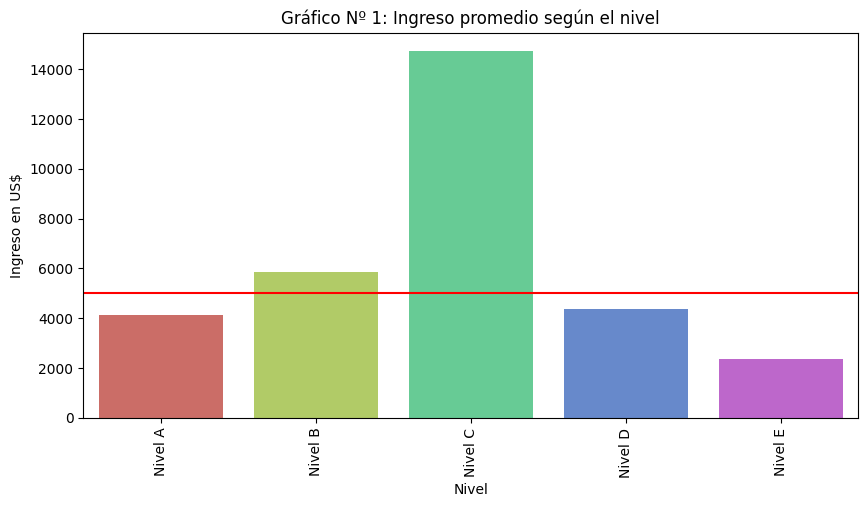

In [ ]:
# Graficamos las medias según una variable
plt.figure(figsize=(10,5))

g = sns.barplot(y="ingreso",
            x="nivel",
            data=medias,
            palette="hls" # "Blues"
            )
g.set_xlabel("Nivel")
g.set_ylabel("Ingreso en US$")
g.set_title("Gráfico Nº 1: Ingreso promedio según el nivel")

plt.axhline(5000, color = 'red')  # añadimos una línea
plt.xticks(rotation=90)  # rotación del texto eje X
plt.show()

###   B.     MEDIDAS DE DISPERSION

#### 1. Rango

In [ ]:
def rango(x):
  min = np.min(x)
  max = np.max(x)
  r = max - min
  return min, max, r


In [ ]:
d = df[var_num].apply(rango, axis=0).T 
d.columns = ["Mínimo","Máximo","Rango"]
d

,Mínimo,Máximo,Rango
edad,20,85,65
meses,95,678,583
max_ant,0,130,130
ingreso,124,30000,29876
score,134,266,132


#### 2. Cuartiles

In [ ]:
def cuartines(x: pd.Series):
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q2 = x.quantile([.50]).values[0]
    Q3 = x.quantile([.75]).values[0]
    min = np.min(x)
    max = np.max(x)
    return min, Q1, Q2, Q3, max

In [ ]:
#Obtenemos los Quartiles
d = df[var_num].apply(cuartines, axis=0).T 
d.columns = ["Mínimo","P25% - Q1","P50% - Q2", "P75% - Q3", "Máximo"]
d

,Mínimo,P25% - Q1,P50% - Q2,P75% - Q3,Máximo
edad,20.0,29.0,35.0,43.0,85.0
meses,95.0,137.0,161.0,207.0,678.0
max_ant,0.0,0.0,14.0,42.0,130.0
ingreso,124.0,1408.0,2500.0,5000.0,30000.0
score,134.0,183.0,197.0,213.0,266.0


Text(0.5, 1.0, 'Gráfico Nº XX: Edad según la nivel')

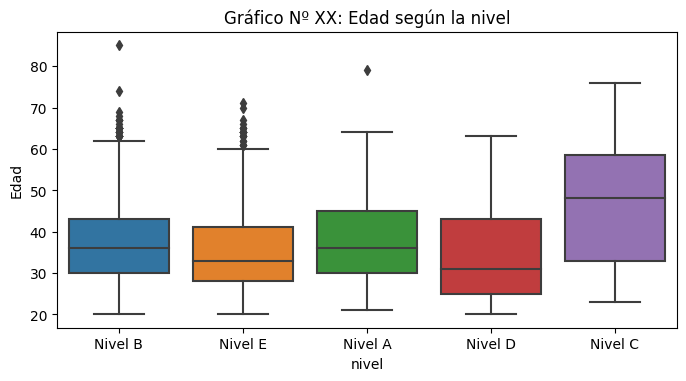

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 3.84))

g=sns.boxplot(
        x     = 'nivel',  # variable cualitativa
        y     = 'edad',  # variable cuantitativa
        data  = df,   # dataframe
        ax    = ax
    )

g.set_xlabel("nivel")
g.set_ylabel("Edad")
g.set_title("Gráfico Nº XX: Edad según la nivel")

#### 3. Rango intercuartil

In [ ]:

def rango_intercuartil(x: pd.Series):
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q3 = x.quantile([.75]).values[0]

    return Q1, Q3 - Q1, Q3

In [ ]:
#Obtenemos los Quartiles

d= df[var_num].apply(rango_intercuartil, axis=0).T 
d.columns = ["Q1","RIC","Q3"]
d

,Q1,RIC,Q3
edad,29.0,14.0,43.0
meses,137.0,70.0,207.0
max_ant,0.0,42.0,42.0
ingreso,1408.0,3592.0,5000.0
score,183.0,30.0,213.0


#### 4. Varianza

In [ ]:
import numpy as np

df[var_num].apply(np.var, axis=0).round(2)

edad             96.42
meses          5334.08
max_ant        1067.65
ingreso    29831421.53
score           371.65
dtype: float64

#### 5. Desviación Estándar

In [ ]:
df[var_num].apply(np.std, axis=0).round(2)

edad          9.82
meses        73.03
max_ant      32.67
ingreso    5461.81
score        19.28
dtype: float64

#### 6. Coeficiente de variación

In [ ]:
def coeficiente_variacion(x):
  m = stats.mean(x)
  sd = np.std(x)
  return sd/m*100

In [ ]:
df[var_num].apply(coeficiente_variacion, axis=0).round(2), "Porciento %"

(edad        26.74
 meses       39.73
 max_ant    121.35
 ingreso    121.45
 score        9.76
 dtype: float64,
 'Porciento %')

#### 7. Cuantiles

In [ ]:
# Obtendremos el cuartil 90 ---> 90%
Q = df["ingreso"].quantile([.90])

print("Mínimo:", min(df["ingreso"].round(2)))
print('Cuantil -->', round(Q, 2))
print("Máximo:", max(df["ingreso"].round(2)))

Mínimo: 124
Cuantil --> 0.9    10000.0
Name: ingreso, dtype: float64
Máximo: 30000


#### 8. Curtosis

In [ ]:
from scipy.stats import kurtosis

def kurtosis_data(x):
  curtosis =  kurtosis(x, fisher=True)

  if curtosis >0:
    return ('Es Leptocúrtica-->', round(curtosis,2 ))
  elif curtosis ==0: # 0.03
    return  ('Es Mesocúrtica-->', round(curtosis,2 ))
  else:
    return  ('Es Platicúrtica-->', round(curtosis,2 ))

In [ ]:
df[var_num].apply(kurtosis_data, axis=0).T

,0,1
edad,Es Leptocúrtica-->,0.17
meses,Es Leptocúrtica-->,6.72
max_ant,Es Leptocúrtica-->,0.29
ingreso,Es Leptocúrtica-->,8.83
score,Es Platicúrtica-->,-0.25


###   C.     CORRELACIONES "R DE PEARSON" & "RHO DE SPEARMAN"

<Figure size 600x400 with 0 Axes>

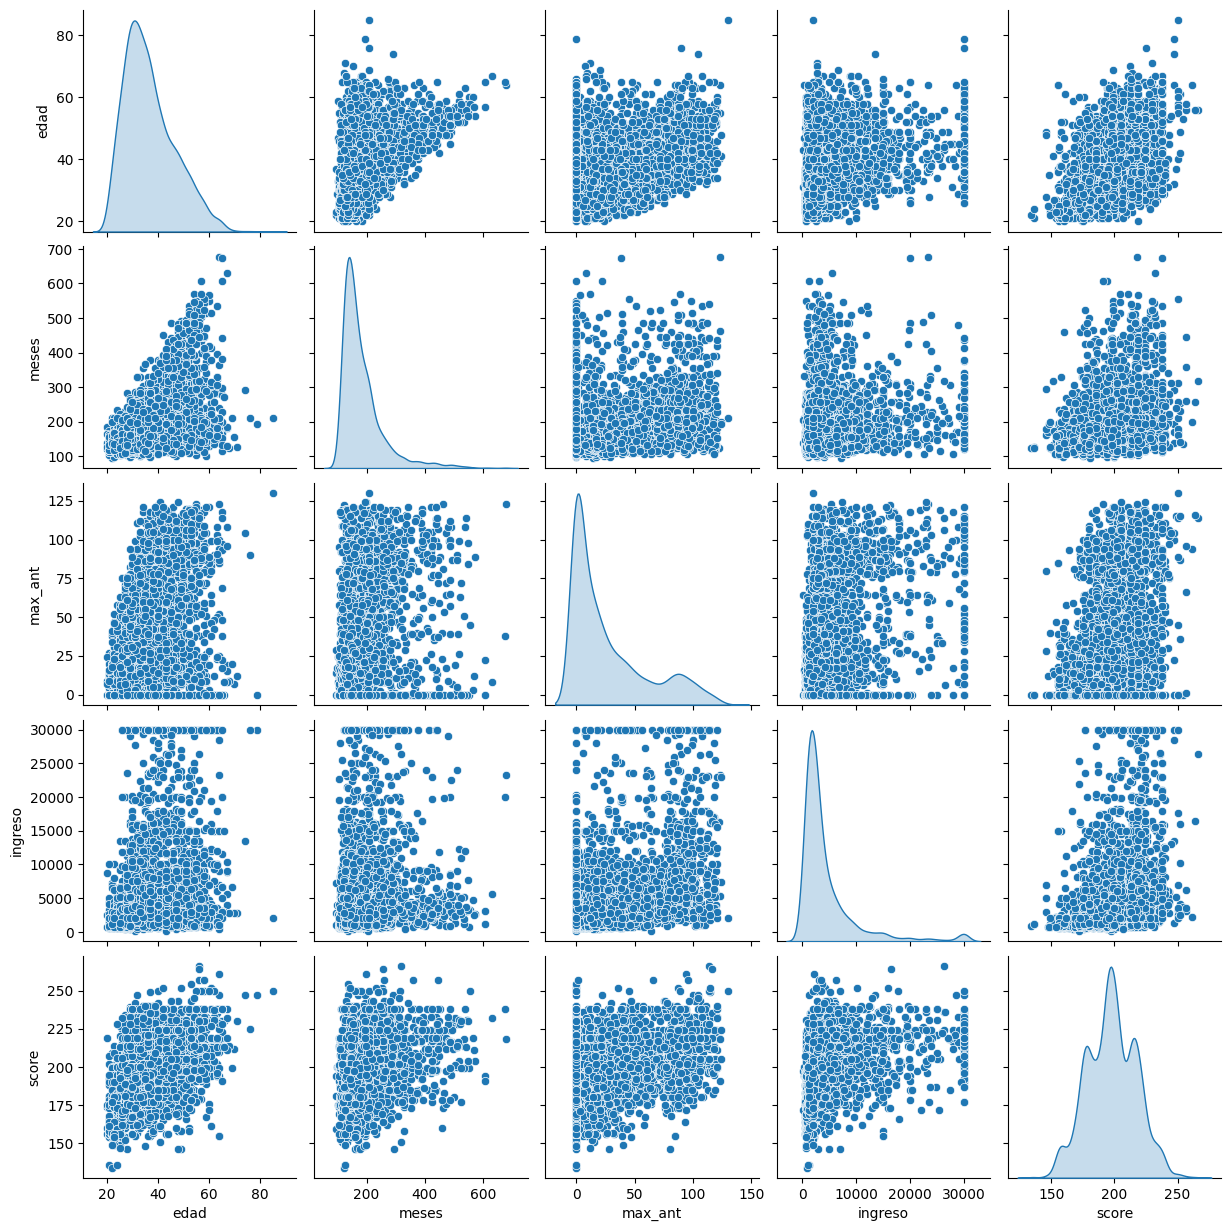

In [ ]:
# gráfico de puntos y curvas
plt.figure(figsize=(6,4))

sns.pairplot(df[var_num], diag_kind='kde');

In [ ]:
df.head()

,ID,edad,meses,max_ant,ingreso,score,tipo_vivienda,zona,nivel,riesgo,riesgo_f
0,2208,33,128,6,3230,192,2,3.0,Nivel B,1,Bueno
1,2211,32,185,7,2930,217,2,1.0,Nivel E,1,Bueno
2,2212,28,184,7,1884,202,2,1.0,Nivel B,1,Bueno
3,2216,56,200,0,850,194,2,1.0,Nivel E,1,Bueno
4,2218,32,131,65,3200,200,2,1.0,Nivel B,1,Bueno


## Correlación: r de pearson

In [ ]:
correlacion = df[var_num].corr(method='pearson').round(3)  # paramétrico

correlacion

,edad,meses,max_ant,ingreso,score
edad,1.000,0.482,0.299,0.285,0.427
meses,0.482,1.000,0.303,0.217,0.264
max_ant,0.299,0.303,1.000,0.422,0.359
ingreso,0.285,0.217,0.422,1.000,0.364
score,0.427,0.264,0.359,0.364,1.000


Text(0.5, 1.0, 'Gráfico Nº XX: Gráfico de la correlación de las variables numéricas')

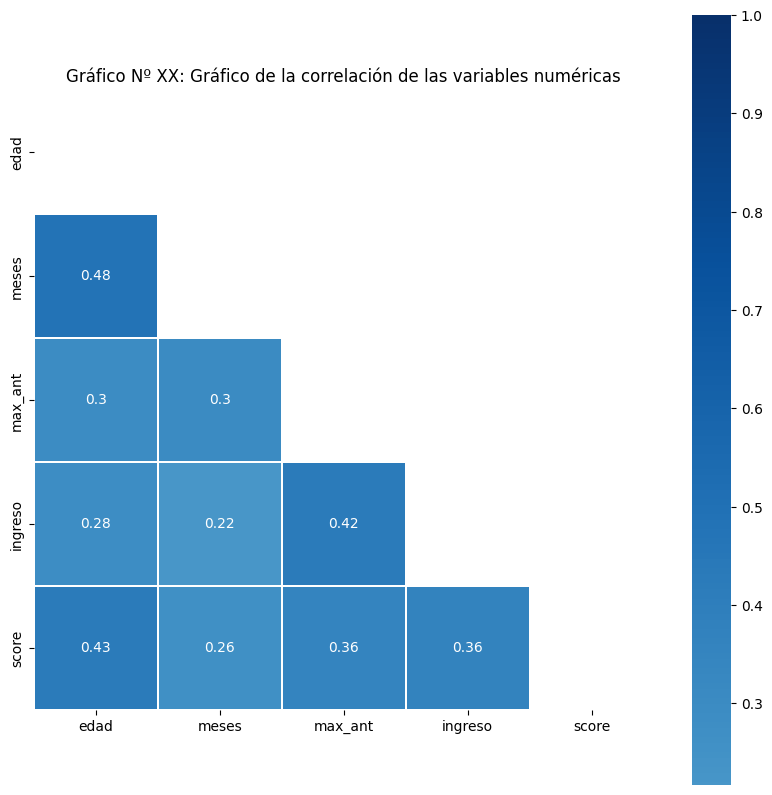

In [ ]:
mask = np.triu(np.ones_like(correlacion, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico
g = sns.heatmap(correlacion, mask = mask, cmap='Blues', vmax=1, center = 0, 
            square = True, linewidths=.1, annot=True)

g.set_title("Gráfico Nº XX: Gráfico de la correlación de las variables numéricas")

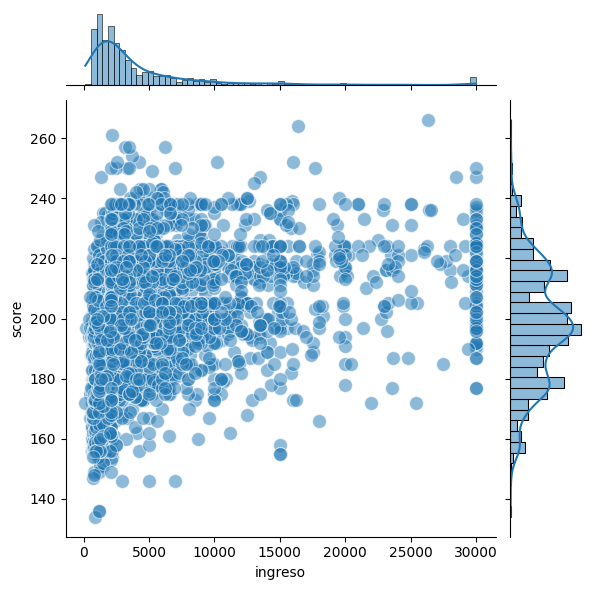

In [ ]:
g = sns.JointGrid(x="ingreso", y="score", data=df)

g.plot_joint(sns.scatterplot, s=100, alpha=.5)  # Efectos de las bubujas s=100, alpha=.5
g.plot_marginals(sns.histplot, kde=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


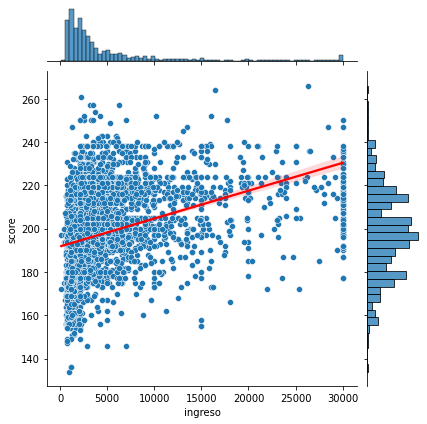

In [ ]:
# con línea de tendencia
g=sns.jointplot(x=df['ingreso'], y=df['score'])

sns.regplot(data=df, x= 'ingreso', y='score', ax=g.ax_joint, scatter=False, color= 'red');

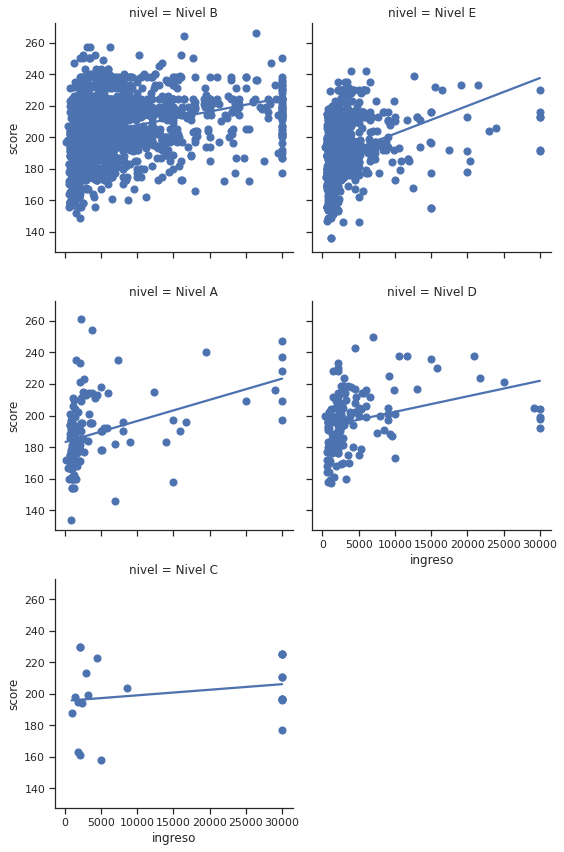

In [ ]:
# con línea de tendencia por grupos

sns.set(style="ticks")
sns.lmplot(x="ingreso", y="score", col='nivel', data=df,
               col_wrap=2, ci=None, palette="muted", height=4,
               scatter_kws={"s": 50, "alpha": 1});

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:1667: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


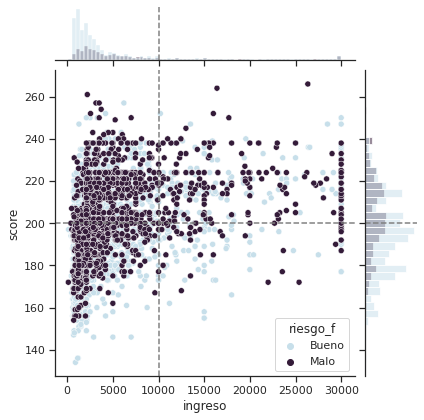

In [ ]:
g = sns.JointGrid(data=df, x="ingreso", y="score", hue="riesgo_f", palette = "ch:s=.50,rot=-.35")
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=10000, y=200)

## Correlación: Rho de Spearman

In [ ]:
Rho = df[var_num].corr(method='spearman').round(3) # no paramétrico
Rho

,edad,meses,max_ant,ingreso,score
edad,1.000,0.443,0.239,0.345,0.416
meses,0.443,1.000,0.286,0.317,0.275
max_ant,0.239,0.286,1.000,0.461,0.339
ingreso,0.345,0.317,0.461,1.000,0.549
score,0.416,0.275,0.339,0.549,1.000


Text(0.5, 1.0, 'Gráfico Nº XX: Gráfico de la correlación Rho de Spearman')

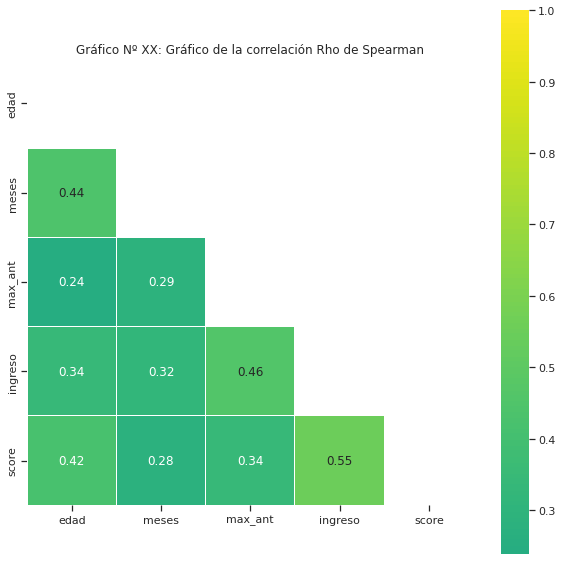

In [ ]:
mask = np.triu(np.ones_like(Rho, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico
g = sns.heatmap(Rho, mask = mask, cmap='viridis', vmax=1, center = 0, 
            square = True, linewidths=.1, annot=True)

g.set_title("Gráfico Nº XX: Gráfico de la correlación Rho de Spearman")

Gracias!

DATA & ANALYTICS

www.datayanalytics.com